In [ ]:
import re #regular expression specifies a set of strings that matches it(the functions in this module let us check if a particular string matches a given regular expression)
import string #Utility function in this string module split the specified string into words using str.split().
import pandas as pd #this  library  provides ready to use high-performance data structures and data analysis tools.
import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
%matplotlib inline 
from plotly import graph_objs as go 

import plotly.express as px
import collections 

import nltk
from nltk.corpus import stopwords

import nltk
import gensim

import warnings
warnings.filterwarnings("ignore")
nltk.download('vader_lexicon')

######## VADER #####
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Covishield.csv', engine='python')
df

,User,Tagged_User,Relationship,Relationship Date (UTC),Tweet,Tweet Date (UTC),Imported ID
0,cbmoghe,jagdishshetty,Mentions,31-03-2021 12:52,RT @ArtiSharma001: Dr @Swamy39Ukraine's army s...,31-03-2021 12:52,1.380000e+18
1,cbmoghe,swamy39,Mentions,31-03-2021 12:52,RT @ArtiSharma001: Dr @Swamy39 Ukraine's army ...,31-03-2021 12:52,1.380000e+18
2,cbmoghe,artisharma001,Mentions,31-03-2021 12:52,RT @ArtiSharma001: Dr @Swamy39 Ukraine's army ...,31-03-2021 12:52,1.380000e+18
3,jammy_eljabry,rashidfawz,Mentions,31-03-2021 12:52,RT @RashidFawz: Received my 1st dose of the Co...,31-03-2021 12:52,1.380000e+18
4,vadagaali,sunilhere_,Replies to,31-03-2021 12:52,@Sunilhere_ Covishield,31-03-2021 12:52,1.380000e+18
...,...,...,...,...,...,...,...
2488,plugintwter,youth4bjp,Mentions,01-04-2021 09:48,RT @youth4bjp: #vaccination drive. Large numbe...,01-04-2021 09:48,1.380000e+18
2489,thepandyan,wangyalpe,Mentions,01-04-2021 09:48,RT @WangyalPe: Many greetings of #HappyHoli to...,01-04-2021 09:48,1.380000e+18
2490,plugintwter,thepandyan,Tweet,01-04-2021 09:52,"India's current monthly vaccine capacity,\n\n#...",01-04-2021 09:52,1.380000e+18
2491,biswadeepdatta,thepandyan,Mentions,01-04-2021 09:52,RT @ThePandyan: India's current monthly vaccin...,01-04-2021 09:52,1.380000e+18


In [ ]:
df = df.drop(['User','Tagged_User','Relationship','Relationship Date (UTC)','Tweet Date (UTC)','Imported ID'], axis=1)


In [ ]:
df.head(5)

,Tweet
0,RT @ArtiSharma001: Dr @Swamy39Ukraine's army s...
1,RT @ArtiSharma001: Dr @Swamy39 Ukraine's army ...
2,RT @ArtiSharma001: Dr @Swamy39 Ukraine's army ...
3,RT @RashidFawz: Received my 1st dose of the Co...
4,@Sunilhere_ Covishield


In [ ]:
df.isnull().sum()

Tweet    0
dtype: int64

In [ ]:
df.describe()

,Tweet
count,2493
unique,1041
top,RT @ARanganathan72: Merkel suspends administra...
freq,283


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   2493 non-null   object
dtypes: object(1)
memory usage: 19.6+ KB


In [ ]:
import string
def clean_text(Tweet):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    Tweet = str(Tweet).lower()
    Tweet = re.sub('\[.*?\%]', '', Tweet)
    Tweet = re.sub('@[\w]+','',Tweet)
    Tweet = re.sub('@?[^\w]+',' ',Tweet)
    Tweet = re.sub('^rt ','',Tweet)
    Tweet = re.sub('https?://\S+|www\.\S+', '', Tweet)
    Tweet = re.sub('<.*?%>+', '', Tweet)
    Tweet = re.sub('[%s]' % re.escape(string.punctuation), '', Tweet)
    Tweet = re.sub('\n', '', Tweet)
    Tweet = re.sub('\w*\d\w*', '', Tweet)
    Tweet = re.sub(r"@(\w+)", ' ', Tweet, flags=re.MULTILINE)
    return Tweet

In [ ]:
df['Tweet'] = df['Tweet'].apply(lambda x:clean_text(x))

In [ ]:
df.Tweet.head(10)

0    dr s army says a servicewoman died after covis...
1    dr ukraine s army says a servicewoman died aft...
2    dr ukraine s army says a servicewoman died aft...
3    received my  dose of the covishield vaccine ba...
4                                           covishield
5    covishield generating good antibody level afte...
6    what has happened to our officials chinese are...
7    india has extended the shelf life of covishiel...
8    this article is a mustread on astrazeneca or c...
9    this article is a mustread on astrazeneca or c...
Name: Tweet, dtype: object

In [ ]:
df['word_count'] = df['Twet'].apply(lambda x : len(x.split()))
df['char_count'] = df['Tweet'].apply(lambda x : len(x.replace(" ","")))
df['word_density'] = df['word_count'] / df['char_count'] + 1

In [ ]:
df.head()

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
dp=sns.distplot(df['word_count'],ax=ax[0])
dp=sns.distplot(df['char_count'],ax=ax[1])
dp=sns.distplot(df['word_density'],ax=ax[2])
plt.show()

In [ ]:
df.describe()

In [ ]:
sentiments = []
for count,tweet in enumerate(df.Tweet):
#     print(tweet)
    sentiments.append(vader.polarity_scores(tweet))
    print(count,vader.polarity_scores(tweet))

0 {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.5574}
1 {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.5574}
2 {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.5574}
3 {'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'compound': -0.296}
4 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 {'neg': 0.179, 'neu': 0.688, 'pos': 0.133, 'compound': 0.0}
6 {'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3818}
7 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
8 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.6369}
9 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.6369}
10 {'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.3612}
11 {'neg': 0.089, 'neu': 0.766, 'pos': 0.145, 'compound': 0.34}
12 {'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3818}
13 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
14 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
15 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
16 {'neg': 0.0, 'neu': 0.

In [ ]:
len(sentiments)

2493

In [ ]:
target = []
for count,sentiment in enumerate(sentiments):
    print(count)
    if sentiment['compound'] >= 0.05: 
        print("Positive")
        target.append('POSITIVE')
    elif sentiment['compound'] <= -0.05 : 
        print("Negative")
        target.append('NEGATIVE')
    else: 
        print("Neutral")
        target.append('NEUTRAL')

0
Negative
1
Negative
2
Negative
3
Negative
4
Neutral
5
Neutral
6
Positive
7
Neutral
8
Positive
9
Positive
10
Positive
11
Positive
12
Positive
13
Neutral
14
Neutral
15
Neutral
16
Positive
17
Positive
18
Neutral
19
Positive
20
Positive
21
Positive
22
Neutral
23
Positive
24
Negative
25
Positive
26
Negative
27
Positive
28
Positive
29
Positive
30
Neutral
31
Neutral
32
Negative
33
Positive
34
Positive
35
Positive
36
Negative
37
Positive
38
Neutral
39
Neutral
40
Neutral
41
Neutral
42
Positive
43
Neutral
44
Positive
45
Positive
46
Neutral
47
Neutral
48
Neutral
49
Positive
50
Positive
51
Positive
52
Positive
53
Neutral
54
Positive
55
Neutral
56
Neutral
57
Neutral
58
Positive
59
Positive
60
Neutral
61
Negative
62
Neutral
63
Neutral
64
Positive
65
Neutral
66
Positive
67
Positive
68
Neutral
69
Positive
70
Neutral
71
Positive
72
Neutral
73
Neutral
74
Neutral
75
Neutral
76
Neutral
77
Neutral
78
Neutral
79
Neutral
80
Neutral
81
Neutral
82
Neutral
83
Neutral
84
Neutral
85
Positive
86
Neutral
87
Neutr

In [ ]:
print(target)

['NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'NEGATIVE', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'NEUTRAL

In [ ]:
target = pd.DataFrame(target, columns=['target'])
target

,target
0,NEGATIVE
1,NEGATIVE
2,NEGATIVE
3,NEGATIVE
4,NEUTRAL
...,...
2488,NEGATIVE
2489,POSITIVE
2490,NEUTRAL
2491,NEUTRAL


In [ ]:
df = pd.concat([df, target], axis = 1)

In [ ]:
#Data Visualization
temp = df.groupby('target').count()['Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

,target,Tweet
1,NEUTRAL,1431
2,POSITIVE,844
0,NEGATIVE,218


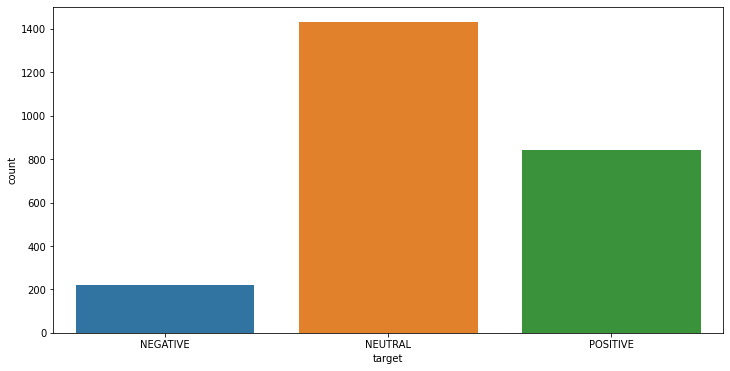

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='target',data=df)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize


In [ ]:
fig = go.Figure(go.Funnelarea(
    text = temp.target,
    values = temp.Tweet,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
split_words = []
top = []
for tweet in df.Tweet:
    top.append(tweet)
top = str(top)
tweet = str(df.Tweet)

In [ ]:
top

"['dr s army says a servicewoman died after covishield vaccination nasdaq ', 'dr ukraine s army says a servicewoman died after covishield vaccination nasdaq ', 'dr ukraine s army says a servicewoman died after covishield vaccination nasdaq ', 'received my  dose of the covishield vaccine batch no  next dose is on wednesday    i urge fellow ke ', ' covishield', 'covishield generating good antibody level after  dose those who are still hesitating abt vaccine might have tough time ', 'what has happened to our officials chinese are not even an inch in india gdp growth is accelerating pakistan is our broth ', 'india has extended the shelf life of covishield from the earlier prescribed six months to nine months from its manufactu ', 'this article is a mustread on astrazeneca or covishield ps love that has made all their coronavirus ', 'this article is a mustread on astrazeneca or covishield ps love that has made all their coronavirus ', 'the general approach to this covishield vaccine at leas

In [ ]:
wordcount = {}
for word in tweet.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    word = word.replace("rt","")
    word = word.replace("","")
    if word not in stop_words:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

,Word,Count
0,dr,3
1,army,3
2,says,3
3,servicewoman,3
4,died,3
5,covis,3
6,vaccine,3
7,ukraine,2
8,aft,2
9,covishield,2


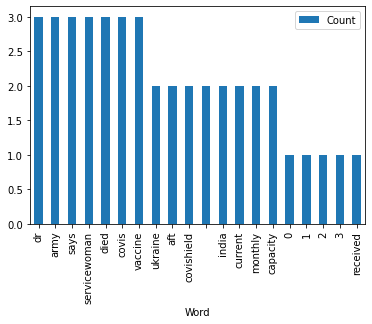

In [ ]:
word_counter = collections.Counter(wordcount)
lst = word_counter.most_common(20)
temp = pd.DataFrame(lst, columns = ['Word', 'Count'])
temp.plot.bar(x='Word',y='Count')
temp.columns = ['Word','Count']
temp.style.background_gradient(cmap='Purples')

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        # stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

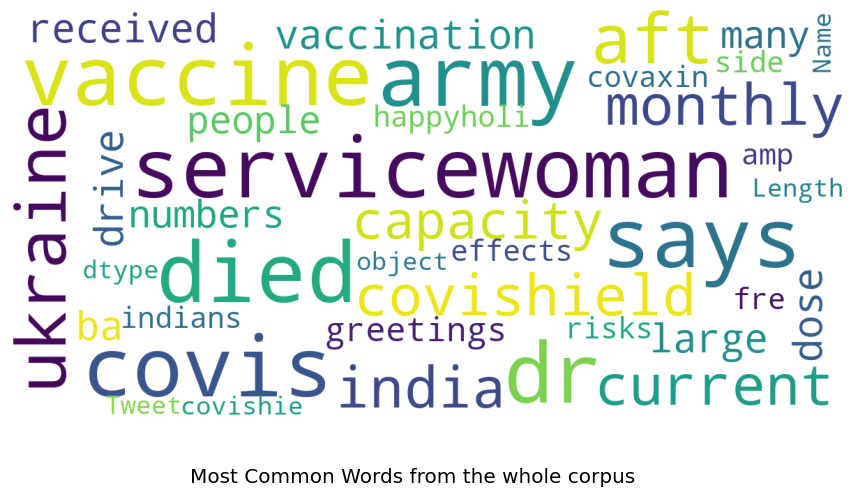

In [ ]:
show_wordcloud(df['Tweet'],'Most Common Words from the whole corpus')

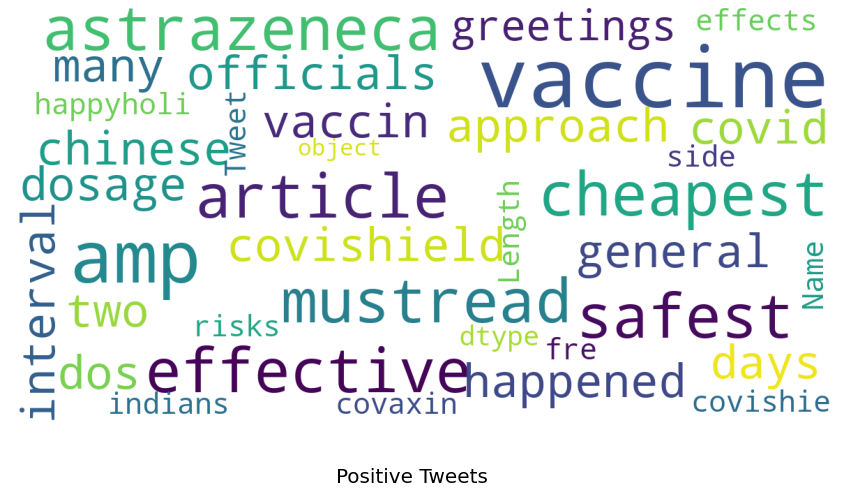

In [ ]:
show_wordcloud(df[df['target'] == 'POSITIVE']['Tweet'],'Positive Tweets')

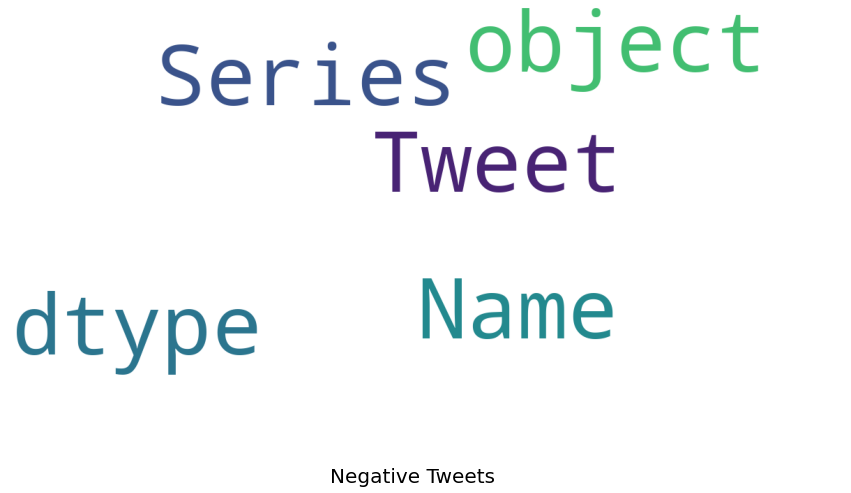

In [ ]:
show_wordcloud(df[df['target'] == 'Negative']['Tweet'], 'Negative Tweets')

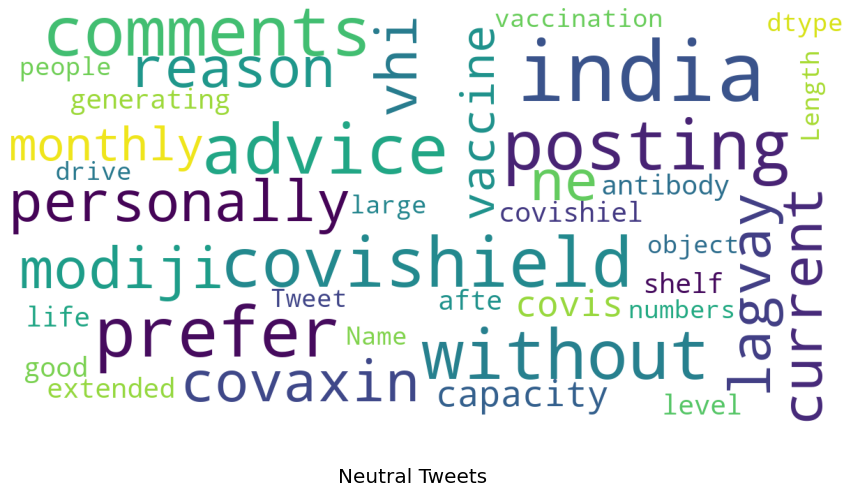

In [ ]:
show_wordcloud(df[df['target'] == 'NEUTRAL']['Tweet'],'Neutral Tweets')

In [ ]:
my_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'a',' a ',' a','a ''below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
df['Text_new'] = df['Tweet'].apply(lambda x:' '.join([word for word in x.split() if word not in  (my_stopwords)]))

In [ ]:
df.Tweet.count()

2493

In [ ]:
df.Text_new.count()

2493

In [ ]:
df.head(10)

,Tweet,target,Text_new
0,dr s army says a servicewoman died after covis...,NEGATIVE,dr army says servicewoman died covishield vacc...
1,dr ukraine s army says a servicewoman died aft...,NEGATIVE,dr ukraine army says servicewoman died covishi...
2,dr ukraine s army says a servicewoman died aft...,NEGATIVE,dr ukraine army says servicewoman died covishi...
3,received my dose of the covishield vaccine ba...,NEGATIVE,received dose covishield vaccine batch next do...
4,covishield,NEUTRAL,covishield
5,covishield generating good antibody level afte...,NEUTRAL,covishield generating good antibody level dose...
6,what has happened to our officials chinese are...,POSITIVE,happened officials chinese even inch india gdp...
7,india has extended the shelf life of covishiel...,NEUTRAL,india extended shelf life covishield earlier p...
8,this article is a mustread on astrazeneca or c...,POSITIVE,article mustread astrazeneca covishield ps lov...
9,this article is a mustread on astrazeneca or c...,POSITIVE,article mustread astrazeneca covishield ps lov...


In [ ]:
fig = px.bar(temp, x="Word", y="Count", title='Commmon Words in Selected Text', orientation='v', 
             width=700, height=700,color='Count')
fig.show()


In [ ]:
w2v_model = gensim.models.word2vec.Word2Vec(size=300, 
                                            window=7, 
                                            min_count=10, 
                                            workers=8)
                                   

In [ ]:
%%time
documents = [_text.split() for _text in df.Text_new] 

CPU times: user 6.56 ms, sys: 0 ns, total: 6.56 ms
Wall time: 8 ms


In [ ]:
w2v_model.build_vocab(documents)

In [ ]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 374
